In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from spacy.util import minibatch, compounding

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
food_reviews_df=pd.read_csv(r'D:\data science\AI\NLP\NLP TASKS\TASK - 57/Reviews.csv')
food_reviews_df.shape

(568454, 10)

In [3]:
food_reviews_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
ProductId,B001E4KFG0,B00813GRG4,B000LQOCH0,B000UA0QIQ,B006K2ZZ7K
UserId,A3SGXH7AUHU8GW,A1D87F6ZCVE5NK,ABXLMWJIXXAIN,A395BORC6FGVXV,A1UQRSCLF8GW1T
ProfileName,delmartian,dll pa,"Natalia Corres ""Natalia Corres""",Karl,"Michael D. Bigham ""M. Wassir"""
HelpfulnessNumerator,1,0,1,3,0
HelpfulnessDenominator,1,0,1,3,0
Score,5,1,4,2,5
Time,1303862400,1346976000,1219017600,1307923200,1350777600
Summary,Good Quality Dog Food,Not as Advertised,"""Delight"" says it all",Cough Medicine,Great taffy
Text,I have bought several of the Vitality canned d...,Product arrived labeled as Jumbo Salted Peanut...,This is a confection that has been around a fe...,If you are looking for the secret ingredient i...,Great taffy at a great price. There was a wid...


In [4]:
food_reviews_df = food_reviews_df[['Text','Score']].dropna()

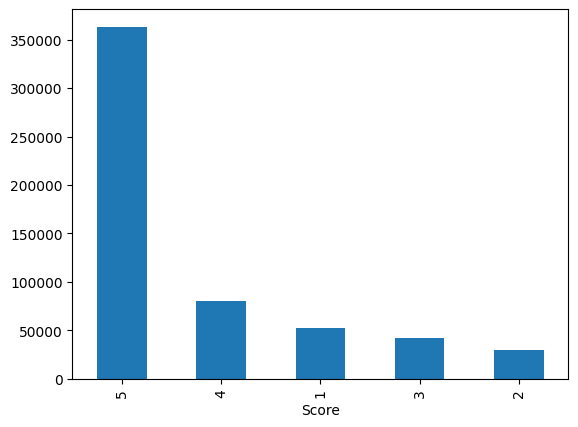

In [5]:
ax=food_reviews_df.Score.value_counts().plot(kind='bar')
fig = ax.get_figure()
fig.savefig("score.png");

In [6]:
food_reviews_df.Score[food_reviews_df.Score<=3]=0
food_reviews_df.Score[food_reviews_df.Score>=4]=1

C:\Users\abida\AppData\Local\Temp\ipykernel_9112\1090184200.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  food_reviews_df.Score[food_reviews_df.Score<=3]=0
C:\Users\abida\AppData\Local\Temp\ipykernel_9112\1090184200.py:1: SettingWithCo

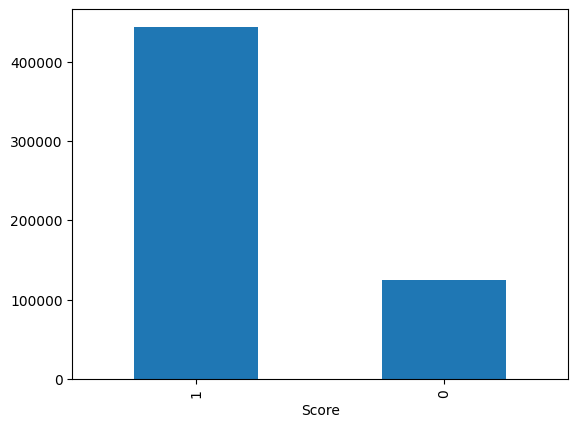

In [7]:
ax=food_reviews_df.Score.value_counts().plot(kind='bar')
fig = ax.get_figure()
fig.savefig("score_boolean.png");

In [8]:
food_reviews_df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [9]:
train_pos_df=food_reviews_df[food_reviews_df.Score==1][:50000]
train_neg_df=food_reviews_df[food_reviews_df.Score==0][:50000]

In [10]:
train_pos_df = food_reviews_df[food_reviews_df.Score == 1][:50000]
train_neg_df = food_reviews_df[food_reviews_df.Score == 0][:50000]

In [11]:
train_df = pd.concat([train_pos_df, train_neg_df], ignore_index=True)

In [12]:

train_df.shape


(100000, 2)

In [13]:
spacy_tok = spacy.load("en_core_web_sm")
sample_review=food_reviews_df.Text[54]
sample_review

"I roast at home with a stove-top popcorn popper (but I do it outside, of course). These beans (Coffee Bean Direct Green Mexican Altura) seem to be well-suited for this method. The first and second cracks are distinct, and I've roasted the beans from medium to slightly dark with great results every time. The aroma is strong and persistent. The taste is smooth, velvety, yet lively."

In [14]:
parsed_review = spacy_tok(sample_review)
parsed_review

I roast at home with a stove-top popcorn popper (but I do it outside, of course). These beans (Coffee Bean Direct Green Mexican Altura) seem to be well-suited for this method. The first and second cracks are distinct, and I've roasted the beans from medium to slightly dark with great results every time. The aroma is strong and persistent. The taste is smooth, velvety, yet lively.

In [16]:
import sys
!{sys.executable} -m pip install explacy

ERROR: Could not find a version that satisfies the requirement explacy (from versions: none)
ERROR: No matching distribution found for explacy


In [18]:
doc = spacy_tok("the salad was surprisingly tasty.")
displacy.render(doc, style="dep", jupyter= True)

In [22]:
from spacy import displacy
doc = spacy_tok(food_reviews_df.Text[0])
displacy.render(doc, style="dep", jupyter=True)

In [23]:
tokenized_text = pd.DataFrame()

for i, token in enumerate(parsed_review):
    tokenized_text.loc[i, 'text'] = token.text
    tokenized_text.loc[i, 'lemma'] = token.lemma_,
    tokenized_text.loc[i, 'pos'] = token.pos_
    tokenized_text.loc[i, 'tag'] = token.tag_
    tokenized_text.loc[i, 'dep'] = token.dep_
    tokenized_text.loc[i, 'shape'] = token.shape_
    tokenized_text.loc[i, 'is_alpha'] = token.is_alpha
    tokenized_text.loc[i, 'is_stop'] = token.is_stop
    tokenized_text.loc[i, 'is_punctuation'] = token.is_punct

tokenized_text[:20]

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punctuation
0,I,"(I,)",PRON,PRP,nsubj,X,True,True,False
1,roast,"(roast,)",VERB,VBP,ROOT,xxxx,True,False,False
2,at,"(at,)",ADP,IN,prep,xx,True,True,False
3,home,"(home,)",NOUN,NN,pobj,xxxx,True,False,False
4,with,"(with,)",ADP,IN,prep,xxxx,True,True,False
5,a,"(a,)",DET,DT,det,x,True,True,False
6,stove,"(stove,)",NOUN,NN,compound,xxxx,True,False,False
7,-,"(-,)",PUNCT,HYPH,punct,-,False,False,True
8,top,"(top,)",NOUN,NN,compound,xxx,True,True,False
9,popcorn,"(popcorn,)",NOUN,NN,compound,xxxx,True,False,False


In [24]:
spacy.displacy.render(parsed_review, style='ent', jupyter=True)

In [25]:
spacy.explain('GPE') 

'Countries, cities, states'

In [26]:
sentence_spans = list(parsed_review.sents)
sentence_spans


[I roast at home with a stove-top popcorn popper (but I do it outside, of course).,
 These beans (Coffee Bean Direct Green Mexican Altura) seem to be well-suited for this method.,
 The first and second cracks are distinct, and I've roasted the beans from medium to slightly dark with great results every time.,
 The aroma is strong and persistent.,
 The taste is smooth, velvety, yet lively.]

In [27]:
displacy.render(parsed_review, style='dep', jupyter=True,options={'distance': 140})

In [28]:
options = {'compact': True, 'bg': 'violet','distance': 140,
           'color': 'white', 'font': 'Trebuchet MS'}
displacy.render(parsed_review, jupyter=True, style='dep', options=options)

In [29]:
spacy.explain("ADJ") ,spacy.explain("det") ,spacy.explain("ADP") ,spacy.explain("prep")

('adjective', 'determiner', 'adposition', 'prepositional modifier')

In [30]:
noun_chunks_df = pd.DataFrame()

for i, chunk in enumerate(parsed_review.noun_chunks):
    noun_chunks_df.loc[i, 'text'] = chunk.text
    noun_chunks_df.loc[i, 'root'] = chunk.root,
    noun_chunks_df.loc[i, 'root.text'] = chunk.root.text,
    noun_chunks_df.loc[i, 'root.dep_'] = chunk.root.dep_
    noun_chunks_df.loc[i, 'root.head.text'] = chunk.root.head.text

noun_chunks_df[:20]

,text,root,root.text,root.dep_,root.head.text
0,I,"(I,)","(I,)",nsubj,roast
1,home,"(home,)","(home,)",pobj,at
2,a stove-top popcorn popper,"(popper,)","(popper,)",pobj,with
3,I,"(I,)","(I,)",nsubj,do
4,it,"(it,)","(it,)",dobj,do
5,course,"(course,)","(course,)",pobj,of
6,These beans,"(beans,)","(beans,)",nsubj,seem
7,Coffee Bean Direct Green Mexican Altura,"(Altura,)","(Altura,)",appos,beans
8,this method,"(method,)","(method,)",pobj,for
9,The first and second cracks,"(cracks,)","(cracks,)",nsubj,are


In [33]:
import sys
!{sys.executable} -m pip install textacy

  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/944.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/944.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/944.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/944.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/944.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/944.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/944.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/944.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/944.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/944.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/944.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/944.8 kB ? eta -:--:--
   --------------------- ---------------- 524.3/944.8 kB 239.6 kB/s eta 0

In [ ]:
import spacy


AttributeError: 'DataFrame' object has no attribute 'text'